In [3]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [7]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] =  features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >=sample_count:
            break
    return features,labels

train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)
test_features,test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [25]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.5933 - acc: 0.6800 - val_loss: 0.4365 - val_acc: 0.8360
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4156 - acc: 0.8195 - val_loss: 0.3600 - val_acc: 0.8550
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3371 - acc: 0.8640 - val_loss: 0.3263 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3038 - acc: 0.8750 - val_loss: 0.2974 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2791 - acc: 0.8855 - val_loss: 0.2840 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2593 - acc: 0.8910 - val_loss: 0.2731 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2423 - acc: 0.9070 - val_loss: 0.2666 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

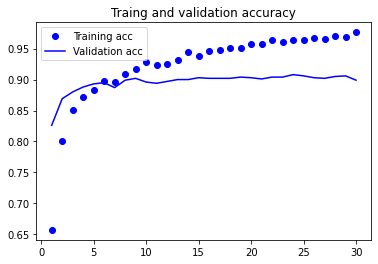

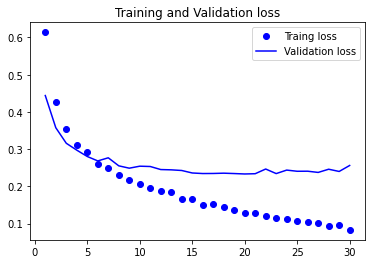

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Traing loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,p)
#     class_mode='binary')



SyntaxError: positional argument follows keyword argument (1390054727.py, line 25)

In [25]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50,
verbose=2)

Epoch 1/30
100/100 - 26s - loss: 0.2360 - acc: 0.9090 - val_loss: 0.1544 - val_acc: 0.9380
Epoch 2/30
100/100 - 23s - loss: 0.1695 - acc: 0.9315 - val_loss: 0.1833 - val_acc: 0.9260
Epoch 3/30
100/100 - 23s - loss: 0.1152 - acc: 0.9530 - val_loss: 0.1265 - val_acc: 0.9530
Epoch 4/30
100/100 - 23s - loss: 0.0945 - acc: 0.9625 - val_loss: 0.0861 - val_acc: 0.9640
Epoch 5/30
100/100 - 23s - loss: 0.0769 - acc: 0.9740 - val_loss: 0.2308 - val_acc: 0.9000
Epoch 6/30
100/100 - 23s - loss: 0.0539 - acc: 0.9800 - val_loss: 0.2290 - val_acc: 0.9310
Epoch 7/30
100/100 - 23s - loss: 0.0617 - acc: 0.9740 - val_loss: 0.1080 - val_acc: 0.9560
Epoch 8/30
100/100 - 23s - loss: 0.0459 - acc: 0.9840 - val_loss: 0.1052 - val_acc: 0.9630
Epoch 9/30
100/100 - 23s - loss: 0.0366 - acc: 0.9850 - val_loss: 0.1115 - val_acc: 0.9600
Epoch 10/30
100/100 - 23s - loss: 0.0381 - acc: 0.9890 - val_loss: 0.0963 - val_acc: 0.9690
Epoch 11/30
100/100 - 23s - loss: 0.0429 - acc: 0.9865 - val_loss: 0.0954 - val_acc: 0.96

In [10]:
model.save('featureExtractionUsingDataQugmentation.h5')

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Traing loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [ ]:
#fine tunning

In [1]:
conv_base.trainable = True

set_tranable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_tranable = True
    if set_tranable:
        layer.trainable = True
    else:
        layer.trainable = False

NameError: name 'conv_base' is not defined

In [2]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

NameError: name 'model' is not defined